# Problem Statement 


## Business and Data Understanding :
Spark Funds has two minor constraints for investments:

- It wants to invest between 5 to 15 million USD per round of investment

- It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in. For the analysis, consider a country to be English speaking only if English is one of the official languages in that country

## Business objective:
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'. (Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.)

# Flow of Analysis:

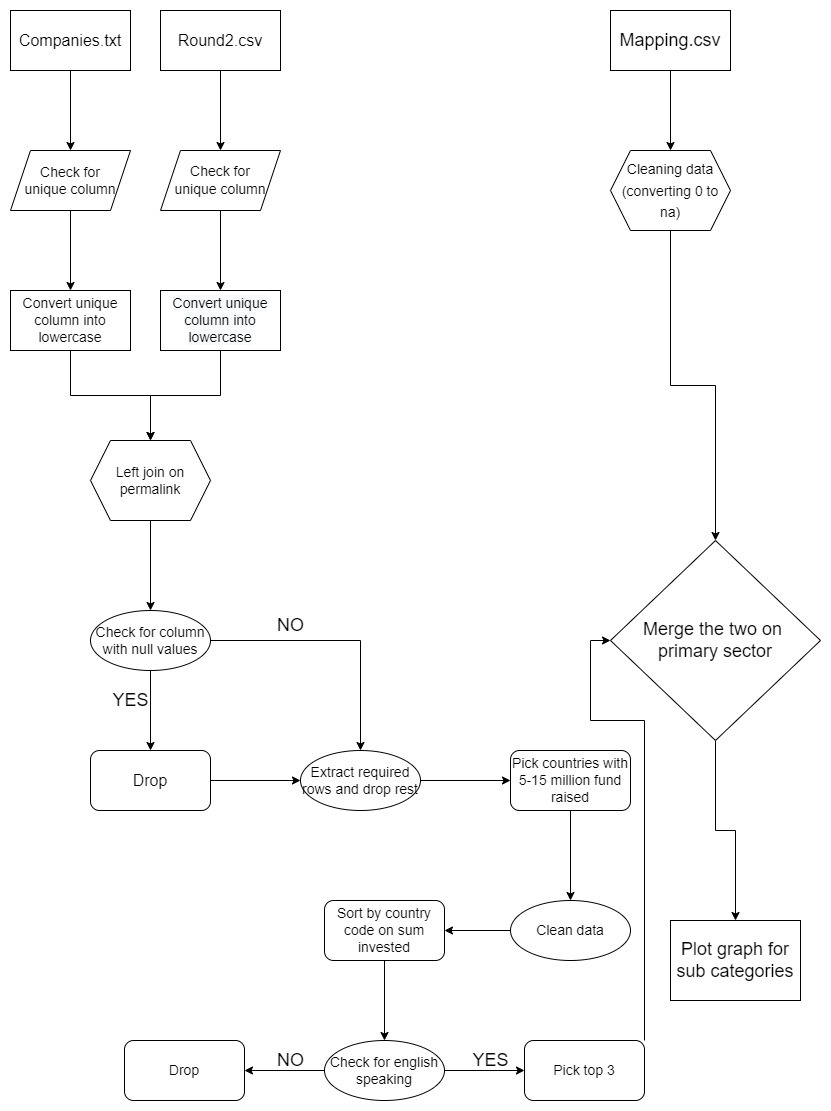

In [ ]:
#import the required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 

1. Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.
2. How many unique companies are present in rounds2?	
3. How many unique companies are present in companies?	                       
4. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.	 
5. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N	 
6. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [ ]:
#Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.

companies = pd.read_csv('./data/companies.txt')
rounds2 = pd.read_csv("./data/rounds2.csv")

In [ ]:
#Lets explore the data
companies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 2.5+ MB


In [ ]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 3.1+ MB


In [ ]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Exeger-Sweden-Ab,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [ ]:
rounds2.describe()

,raised_amount_usd
count,"94,959.00"
mean,"10,426,869.33"
std,"114,821,247.98"
min,0.00
25%,"322,500.00"
50%,"1,680,511.00"
75%,"7,000,000.00"
max,"21,271,935,000.00"


In [ ]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"


#### How many unique companies are present in rounds2?

In [ ]:
print(len(rounds2.company_permalink.str.lower().unique()))

66370


#### How many unique companies are present in companies?

In [ ]:
print(len(companies.permalink.str.lower().unique()))

66368


In [ ]:
# Lets clean up the fileds on which we are going to merge the tables
companies['permalink'] = companies['permalink'].str.lower()
# now the unique count should be same without having to use lower
print(len(companies.permalink.unique()))

#rounds2['permalink'] = rounds2['company_permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
# now the unique count should be same without having to use lower
print(len(rounds2.company_permalink.unique()))

66368
66370


**(66370 - 66368) **
So there are 2 compaines information missing that have information in rounds2 table.

In [ ]:
master_frame = pd.merge(rounds2, companies , how='left', left_on='company_permalink', right_on='permalink',indicator=True)


#### How many observations are present in master_frame?

In [ ]:
print(len(master_frame))


114949


In [ ]:
len(master_frame[master_frame['_merge'] != 'both' ])
master_frame[master_frame['_merge'] != 'both' ]


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,"1,625,585.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


## Funding Type Analysis

In [ ]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 17 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
_merge                     114949 non-null category
dtypes: category(1), float64(1), object

In [ ]:
master_frame.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                   True
name                        True
homepage_url                True
category_list               True
status                      True
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
_merge                     False
dtype: bool

In [ ]:
# summing up the missing values (column-wise)
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
_merge                         0
dtype: int64

In [ ]:
print(((master_frame.isnull().sum()/len(master_frame.index))*100).round())

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        73.00
funded_at                  0.00
raised_amount_usd         17.00
permalink                  0.00
name                       0.00
homepage_url               5.00
category_list              3.00
status                     0.00
country_code               8.00
state_code                10.00
region                     9.00
city                       9.00
founded_at                18.00
_merge                     0.00
dtype: float64


#### Dropping unnecessary columns
For Sparks Funds, we are mostly driving our analysis based on funding round type, category, country etc. Hence, so many columns present in the master_frame are not needed, we will drop those columns.

In [ ]:
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)

In [ ]:
#Inspecting the Null values percentage again after deletion, column-wise
print(((master_frame.isnull().sum()/len(master_frame.index))*100).round())

company_permalink     0.00
funding_round_type    0.00
raised_amount_usd    17.00
name                  0.00
category_list         3.00
country_code          8.00
_merge                0.00
dtype: float64


#### Dropping unnecessary rows
For the remaining columns of master_frame dataframe, we can see that there are columns which still have null counts, let's drop those rows and inspect the dataframe again.

In [ ]:
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                             master_frame['category_list'].isnull())]

In [ ]:
# fraction of rows lost
len(master_frame.index)/114942

0

In [ ]:
print(((master_frame.isnull().sum()/len(master_frame.index))*100).round())

company_permalink    0.00
funding_round_type   0.00
raised_amount_usd    0.00
name                 0.00
category_list        0.00
country_code         0.00
_merge               0.00
dtype: float64


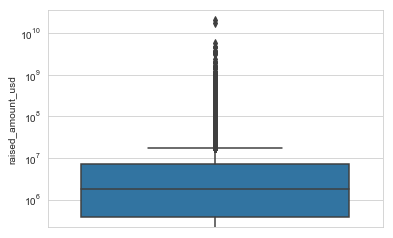

In [ ]:
#just for analysys
sns.boxplot(y=master_frame['raised_amount_usd'])
plt.yscale('log')
plt.show()

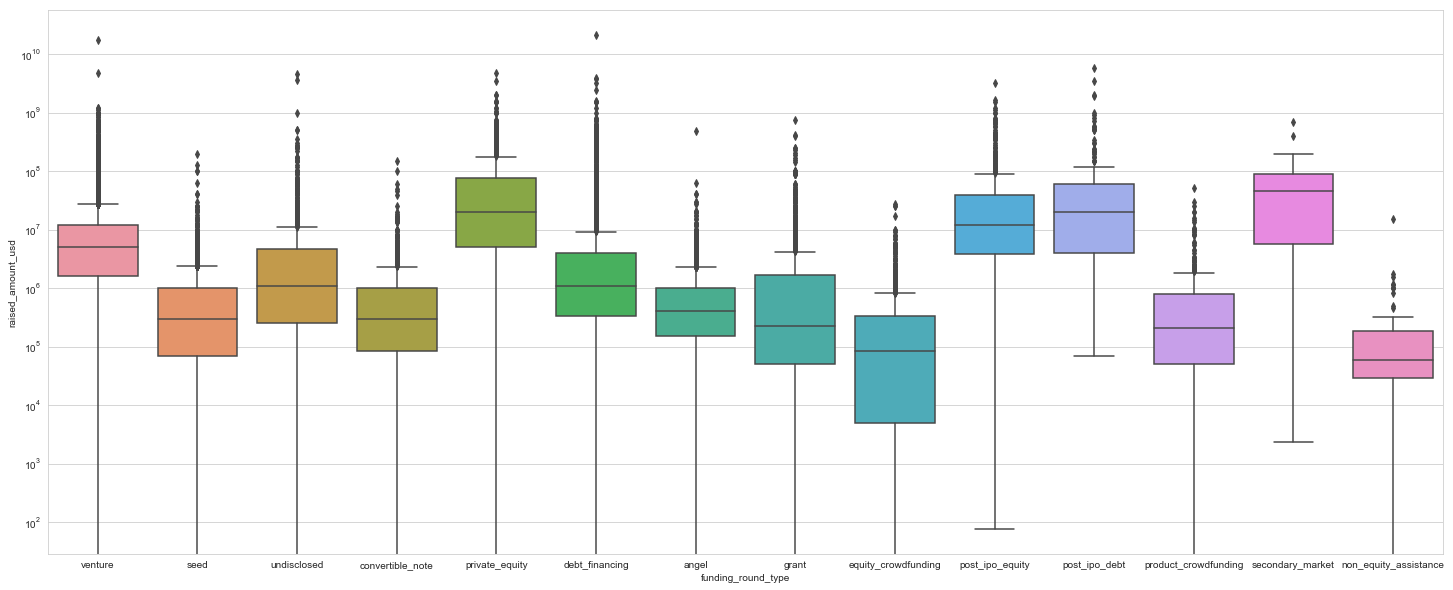

In [ ]:
# a boxplot of a variable across various funding categories just for analysys
plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

In [ ]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)
# averages

funding_round_type
post_ipo_debt           169,451,789.77
secondary_market         84,438,532.25
private_equity           73,938,486.28
post_ipo_equity          66,077,058.57
debt_financing           17,167,653.47
undisclosed              15,891,661.39
venture                  11,724,222.69
grant                     4,512,698.29
product_crowdfunding      1,353,226.91
convertible_note          1,337,186.65
angel                       971,573.89
seed                        747,793.68
equity_crowdfunding         509,897.97
non_equity_assistance       480,753.38
Name: raised_amount_usd, dtype: float64

In [ ]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)
# medians

funding_round_type
secondary_market        45,850,000.00
private_equity          20,000,000.00
post_ipo_debt           19,900,000.00
post_ipo_equity         12,262,852.50
venture                  5,000,000.00
undisclosed              1,100,000.00
debt_financing           1,096,653.00
angel                      414,906.00
seed                       300,000.00
convertible_note           300,000.00
grant                      225,000.00
product_crowdfunding       211,500.00
equity_crowdfunding         85,000.00
non_equity_assistance       60,000.00
Name: raised_amount_usd, dtype: float64

#### Calculate the average investment amount for each of the four funding types.

Average funding amount of venture type
Average funding amount of seed type
Average funding amount of angel type
Average funding amount of private_equity type

In [ ]:
#Retaining the rows with only four investment types
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]

#Just creating a copy of the master_frame dataframe which will be used for ploting in Checkpoint 6
master_frame_for_plot = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]

In [ ]:
#Converting $ to million $.
#master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
#master_frame.head()

In [ ]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)
# averages

funding_round_type
private_equity   73,938,486.28
venture          11,724,222.69
angel               971,573.89
seed                747,793.68
Name: raised_amount_usd, dtype: float64

In [ ]:
#Retaining rows with only venture type. As Spark Funds wants to invest between 5 to 15 million USD per investment round
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 

#Dropping the column 'funding_round_type' as it is going to be venture type this point forward
#master_frame = master_frame.drop(['funding_round_type'], axis = 1)

## ------------------------------------------------------------------------------------------------------------------------------


## Country Analysis

1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [ ]:
top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)
top9 = top9.iloc[:9, ]
top9
#Just creating a copy of the top9 dataframe which will be used for ploting in Checkpoint 6
top9_for_plt=top9


In [ ]:
#Retaining rows with only USA, GBR and IND country_codes. As SparksFunds wants to invest in only top three English speaking countries.
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,_merge
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,both
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA,both
11,/ORGANIZATION/0XDATA,venture,1700000.0,H2O.ai,Analytics,USA,both
12,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA,both
22,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,USA,both


## Sector Analysis

1. Extract the primary sector of each category list from the category_list column

2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 
(Note that ‘Others’ is also considered one of the main sectors)

In [ ]:
#Extracting the primary vector value
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])

In [ ]:
#Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 
# (Note that ‘Others’ is also considered one of the main sectors)

mapping = pd.read_csv('./data/mapping.csv')
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [ ]:
#Reshaping the mapping dataframe to merge with the master_frame dataframe. Using melt() function to unpivot the table.
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [ ]:
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,_merge,main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,both,Entertainment
1,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA,both,"Social, Finance, Analytics, Advertising"
2,/ORGANIZATION/0XDATA,venture,1700000.0,H2O.ai,Analytics,USA,both,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA,both,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps,USA,both,"News, Search and Messaging"


In [ ]:
#List of primary sectors which have no main sectors in the master_frame
print(master_frame[master_frame.main_sector.isnull()].category_list.unique())

[u'Nanotechnology' u'Natural Gas Uses' u'Natural Language Processing'
 u'Adaptive Equipment' u'Racing' u'Specialty Retail'
 u'Biotechnology and Semiconductor' u'Rapidly Expanding' u'Navigation'
 u'Product Search' u'GreenTech' u'Retirement']


In [ ]:
#Retaining the rows which have main_sector values
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index)

38642

## Sector Analysis 

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

1. All the columns of the master_frame along with the primary sector and the main sector

2. The total number (or count) of investments for each main sector in a separate column

3. The total amount invested in each main sector in a separate column

In [ ]:
#Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations.

D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D1_gr = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D1 = D1.merge(D1_gr, how='left', on ='main_sector')
D1.head()

C:\Anaconda2\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,_merge,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA,both,"Social, Finance, Analytics, Advertising",2.380738e+10,2714
1,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps,USA,both,"News, Search and Messaging",1.395957e+10,1582
2,/ORGANIZATION/128-TECHNOLOGY,venture,11999347.0,128 Technology,Service Providers,USA,both,Others,2.632101e+10,2950
3,/organization/1366-technologies,venture,15000000.0,1366 Technologies,Manufacturing,USA,both,Manufacturing,7.258553e+09,799
4,/ORGANIZATION/1366-TECHNOLOGIES,venture,5000000.0,1366 Technologies,Manufacturing,USA,both,Manufacturing,7.258553e+09,799


In [ ]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D2_gr = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D2 = D2.merge(D2_gr, how='left', on ='main_sector')
D2.head()

C:\Anaconda2\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,_merge,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/ORGANIZATION/365SCORES,venture,5500000.0,365Scores,Android,GBR,both,"Social, Finance, Analytics, Advertising",1.089404e+09,133
1,/organization/7digital,venture,8468328.0,7digital,Content Creators,GBR,both,Entertainment,4.827847e+08,56
2,/ORGANIZATION/7DIGITAL,venture,10000000.0,7digital,Content Creators,GBR,both,Entertainment,4.827847e+08,56
3,/organization/90min,venture,15000000.0,90min,Media,GBR,both,Entertainment,4.827847e+08,56
4,/ORGANIZATION/90MIN,venture,5800000.0,90min,Media,GBR,both,Entertainment,4.827847e+08,56


In [ ]:
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D3_gr = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D3 = D3.merge(D3_gr, how='left', on ='main_sector')
D3.head()

C:\Anaconda2\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,_merge,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,both,Entertainment,2.808300e+08,33
1,/ORGANIZATION/21DIAMONDS-INDIA,venture,6369507.0,21Diamonds,E-Commerce,IND,both,Others,1.013410e+09,110
2,/ORGANIZATION/A-LITTLE-WORLD,venture,6410000.0,A LITTLE WORLD,Finance,IND,both,"Social, Finance, Analytics, Advertising",5.505496e+08,60
3,/ORGANIZATION/ADLABS-IMAGICA,venture,8180000.0,Adlabs Imagica,Entertainment,IND,both,Entertainment,2.808300e+08,33
4,/ORGANIZATION/AGILE,venture,5740000.0,Agile,Finance,IND,both,"Social, Finance, Analytics, Advertising",5.505496e+08,60


In [ ]:
#Total number of investments (count)
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12012
619
328


In [ ]:
#Total amount of investment (USD)
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

1.07318294664e+11
5365228300.0
2949543602.0


In [ ]:
#Top sector, second-top, third-top for D1 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D1
D1_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                          1.454104e+09         167
Cleantech / Semiconductors                   2.120663e+10        2300
Entertainment                                5.099198e+09         591
Health                                       8.211859e+09         909
Manufacturing                                7.258553e+09         799
News, Search and Messaging                   1.395957e+10        1582
Others                                       2.632101e+10        2950
Social, Finance, Analytics, Advertising      2.380738e+10        2714

In [ ]:
#Top sector, second-top, third-top for D2 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D2
D2_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                          1.670516e+08          16
Cleantech / Semiconductors                   1.150140e+09         128
Entertainment                                4.827847e+08          56
Health                                       2.145375e+08          24
Manufacturing                                3.619403e+08          42
News, Search and Messaging                   6.157462e+08          73
Others                                       1.283624e+09         147
Social, Finance, Analytics, Advertising      1.089404e+09         133

In [ ]:
#Top sector, second-top, third-top for D2 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D3
D3_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                          1.369000e+08          13
Cleantech / Semiconductors                   1.653800e+08          20
Entertainment                                2.808300e+08          33
Health                                       1.677400e+08          19
Manufacturing                                2.009000e+08          21
News, Search and Messaging                   4.338345e+08          52
Others                                       1.013410e+09         110
Social, Finance, Analytics, Advertising      5.505496e+08          60

In [ ]:
#For the top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/virtustream         49300000.0
                     raised_amount_usd
company_permalink                     
/organization/zoove         49800000.0


In [ ]:
#For the top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                       raised_amount_usd
company_permalink                       
/organization/sensage         30000000.0
                                     raised_amount_usd
company_permalink                                     
/organization/celltick-technologies         29000000.0


In [ ]:
#For the top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='News, Search and Messaging']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                      raised_amount_usd
company_permalink                      
/ORGANIZATION/MYNTRA         30000000.0
                                                raised_amount_usd
company_permalink                                                
/ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD         21000000.0


## Graph Plots

1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

### 1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. 

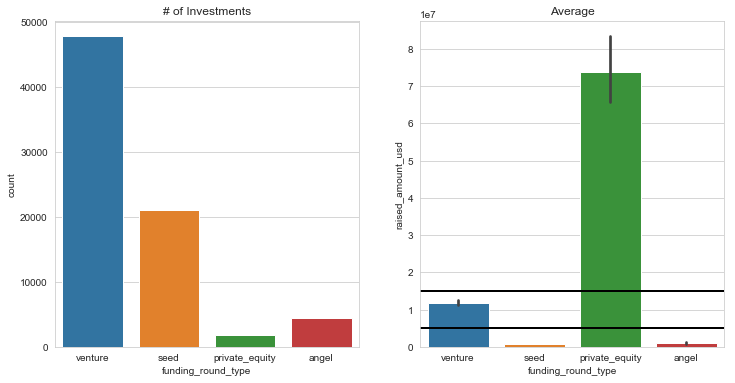

In [ ]:
# set a seaborn style of your taste
sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame_for_plot)
plt.title("# of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame_for_plot, estimator=np.mean)
plt.title("Average")
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.show()

### 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

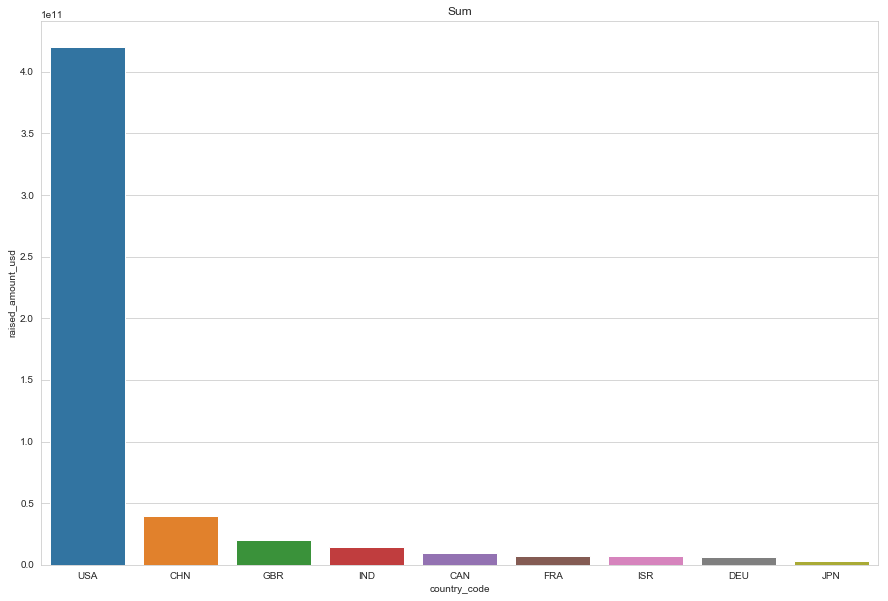

In [ ]:
# Plotting sum across top 9 country_code 
top9_for_plt['country_code'] = top9_for_plt.index
plt.figure(figsize=(15, 10))
#plt.subplot(1, 2, 1)
#sns.countplot(data=top9,x='country_code')
#plt.title("Count")
plt.plot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top9_for_plt, estimator=sum)
plt.title("Sum")
plt.show()

### 3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart

### USA

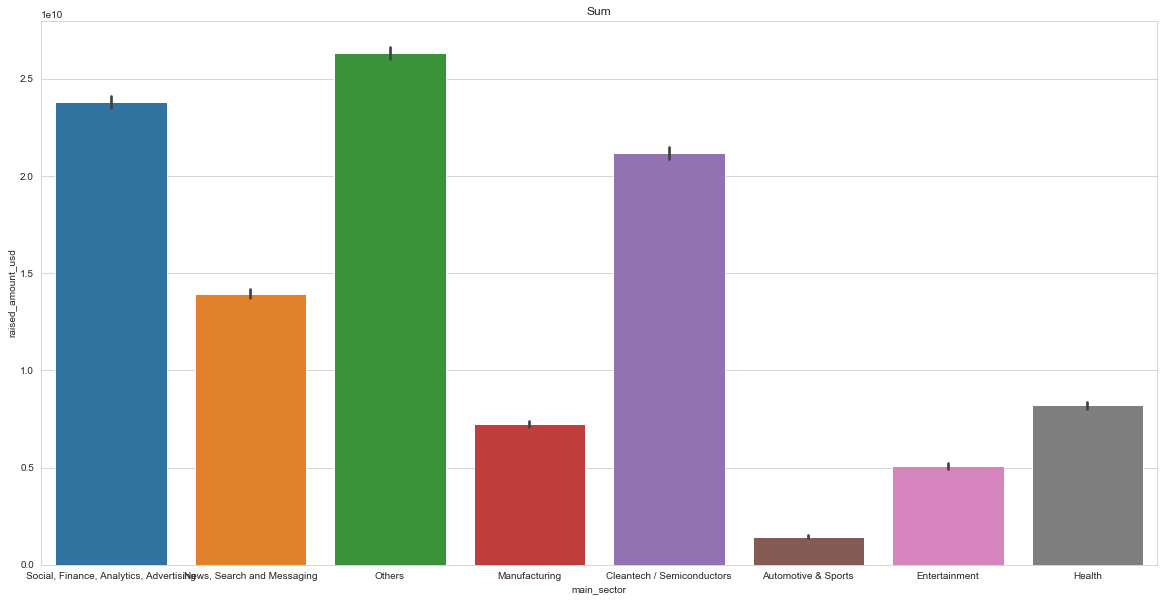

In [ ]:
#lets have a look at the top 3 sectors 1st for USA
plt.figure(figsize=(20, 10))
sns.barplot(x="main_sector", y="raised_amount_usd", data=D1, estimator=sum)
plt.title("Sum")
plt.show()

### Great Britian



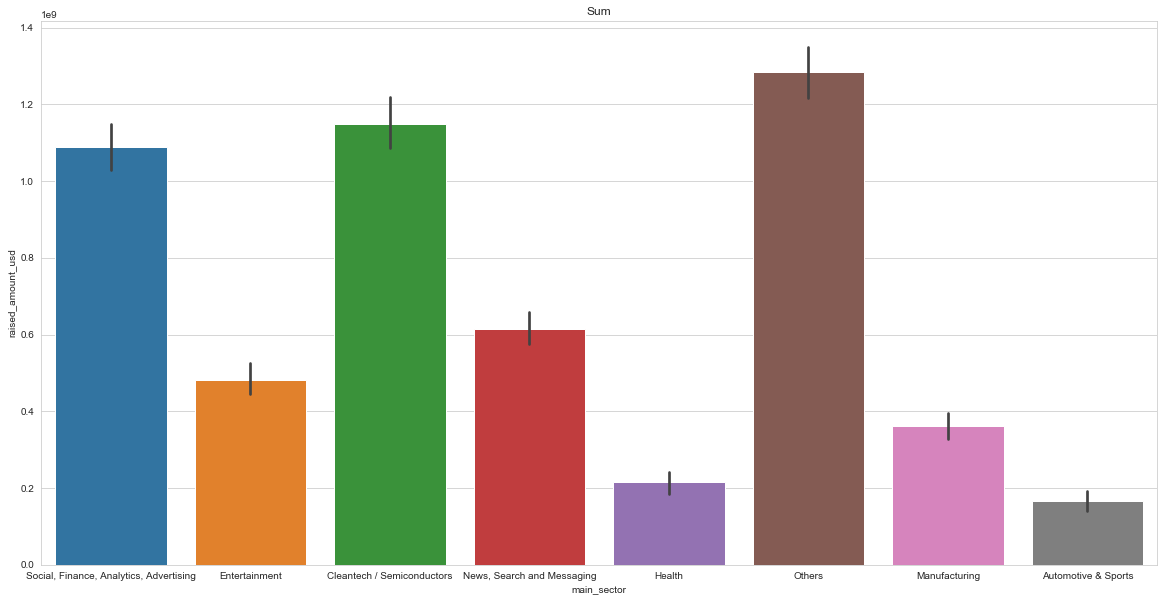

In [ ]:
#lets have a look at the top 3 sectors 1st for Great Britian
plt.figure(figsize=(20, 10))
sns.barplot(x="main_sector", y="raised_amount_usd", data=D2, estimator=sum)
plt.title("Sum")
plt.show()


### India


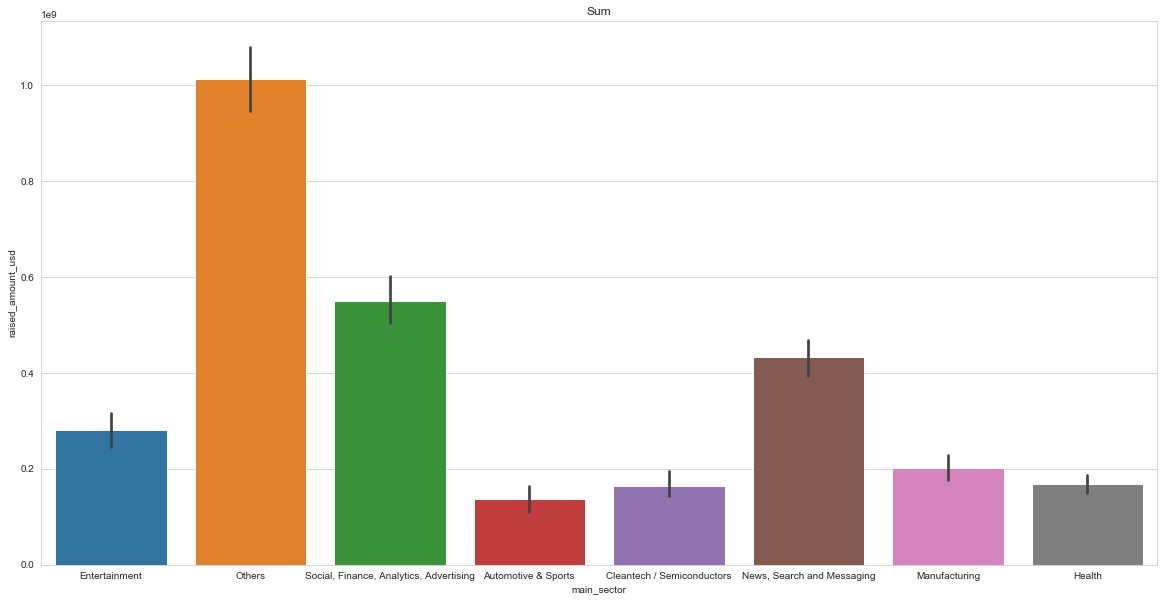

In [ ]:
#lets have a look at the top 3 sectors 1st for India
plt.figure(figsize=(20, 10))
sns.barplot(x="main_sector", y="raised_amount_usd", data=D3, estimator=sum)
plt.title("Sum")
plt.show()

In [ ]:
D1 = D1[D1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]

D2 = D2[D2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]

D3 = D3[D3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]

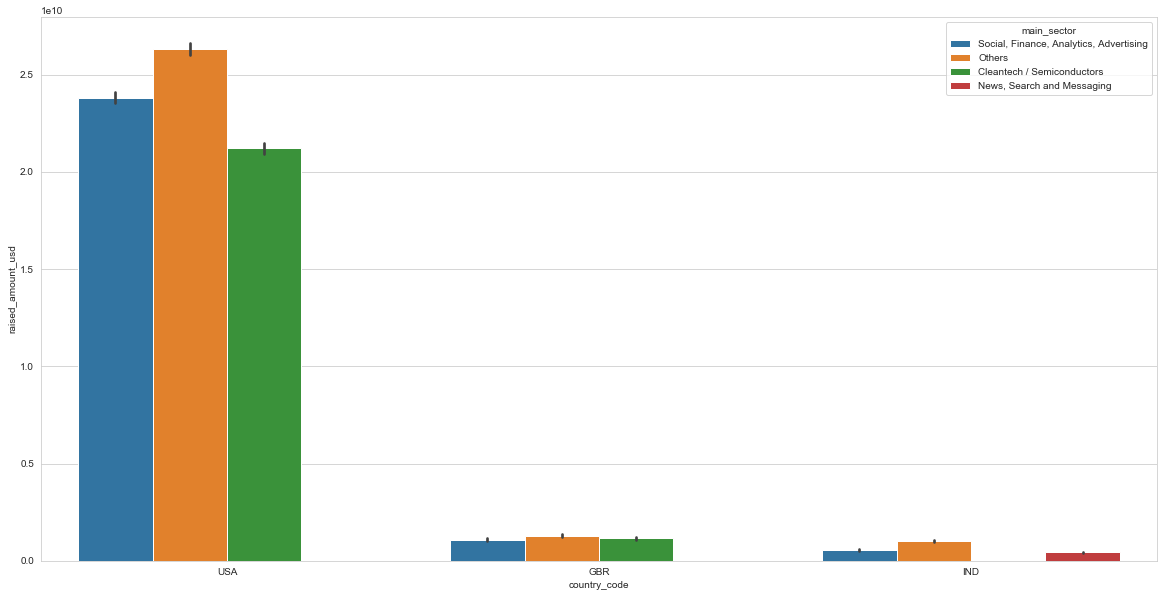

In [ ]:
#now lets draw the plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
frames = [D1, D2, D3]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=result, estimator=np.sum)
plt.show()
